# 1. Introduction and Importing Libraries

Spam detection is extremelly important for communication business because of its significant impact in security, among other reasons. Modern society is extremely bind to portable electronic devices, which are commonly set up to notify its owner of any news coming in from any unknown source. To say the mimimun, its an incovenient to constantly have the inbox filled with or being bothered by notifications from unwanted messages.

Furthermore, there is a more significant and important reason for Spam detection. Spam often offer cyber threats such as possibilites for spreading malwares and ransomwares, that are correlated to data leakage and theft, and can be also related to cyber crimes such as phishing.

Therefore, creating models capable of identifying correctly Spam is a measure to enhance the experience of final users of communication services.

In this project, we have a dataset containing SMS text, classified as Spam or Not. Our main objective is creating a model capable of analysing SMS text, and identifying whether it is a Spam message of not. 

In [1]:
#Importing libraries for basic data manipulation and visualisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import time

import warnings
warnings.filterwarnings('ignore')

#Importing libraries to deal with Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline

#Importing libraries to deal with text
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
#Code to print all the plots centralised on the report.
from IPython.core.display import HTML

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# 2. Characterisation of the data

In [3]:
#Reading the data
df = pd.read_csv('/Users/arthurassis/Documents/Personal Projects/CodSoft Internship/SPAM SMS DETECTION DATASET/spam.csv',
                encoding_errors = 'ignore')

In [4]:
#Printing the first 5 rows
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
df[df['Unnamed: 2'].notna()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
1127,ham,"Height of \Oh shit....!!\"" situation: A guy th...",".;-):-D""",NaN,NaN
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny,just been in bedbut mite go 2 thepub l8tr if u...,NaN,NaN
1384,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN


As we are dealing with text, apparently some of the messages had been cut on the conversion to .csv file fore some reason, sometimes more than once, and the text ended up split into different columns. When we look to the sentences, Unnamed: 1, Unnamed: 2, and Unnamed: 3, seem to be a sequence of v2. Therefore, we will consider they are a sequence, and we will concatenate all of them, without any spaces, into a new column called 'text'.

In [8]:
df = df.fillna('')

In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [10]:
df['text']=df['v2']+df['Unnamed: 2']+df['Unnamed: 3']+df['Unnamed: 4']

In [11]:
df[df['Unnamed: 2']!='']['text']

95      Your free ringtone is waiting to be collected....
281     \Wen u miss someone the person is definitely s...
444     \HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...
671     SMS. ac sun0819 posts HELLO:\You seem cool wan...
710     Height of Confidence: All the Aeronautics prof...
899     Your free ringtone is waiting to be collected....
1038    Edison has rightly said, \A fool can ask more ...
1127    Height of \Oh shit....!!\" situation: A guy th...
1266    \Hey sorry I didntgive ya a a bellearlier hunn...
1384    Storming msg: Wen u lift d phne, u say \HELLO\...
1428    Tell you what, if you make a little spreadshee...
1559    Single line with a big meaning::::: \Miss anyt...
1637    0A$NETWORKS allow companies to bill for SMS, s...
1669    Very hurting n meaningful lines ever: \I compr...
1675    Painful words- \I thought being Happy was the ...
1936    My planning usually stops at \find hella weed ...
1937    The fact that you're cleaning shows you know w...
1997    \YEH I

In [12]:
df[df['Unnamed: 2']!='']['text'].loc[281]

'\\Wen u miss someone the person is definitely special for u..... But if the person is so special why to miss them just Keep-in-touch\\" gdeve.."'

In [13]:
df[df['Unnamed: 2']!='']['text'].loc[1637]

'0A$NETWORKS allow companies to bill for SMS, so they are responsible for their \\suppliers\\" just as a shop has to give a guarantee on what they sell. B. G."'

We consider the concatenation is correctly gathering the message together, therefore only the target variable and the new feature 'text' will be kept.

In [14]:
df.drop(columns = ['v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [15]:
df.head()

,v1,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Verifying nulls in our dataset

In [16]:
df.isnull().sum()

v1      0
text    0
dtype: int64

No nulls are found in the dataset, therefore we will proceed checking duplicate rows.

## Verifying duplicate rows in our dataset

In [17]:
df.duplicated().sum()

404

The dataset contains 404 duplicated rows, as our intention is identifying patterns within SMS text that could lead to interpret a message as Spam, and not to analyse amount of messages with the same content, there is no reason for keeping duplicated rows, thus, they will be dropped.

In [18]:
df = df.drop_duplicates()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5168 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5168 non-null   object
 1   text    5168 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


We observe we dropped the 404 rows that were duplicated within our data.

# 3. Exploratory data analysis

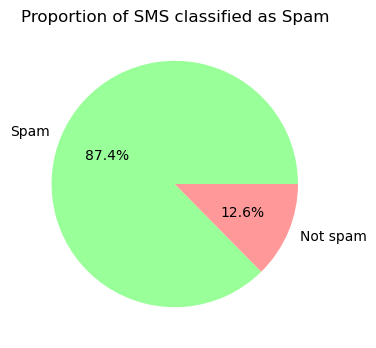

In [20]:
#Plotting a pie plot to verify proportion spam on our dataset
crosstab = pd.crosstab(df['v1'], columns = 'count').reset_index()
plt.subplots(figsize=(4, 4))
plt.pie(data = crosstab, labels = ['Spam', 'Not spam'], x='count', autopct="%.1f%%",
       colors= ['#99ff99','#ff9999']);
plt.title ('Proportion of SMS classified as Spam');

## 3.1. Feature engineering from text

In [21]:
#Finding the number of characters in each row of our text

df['Num_char'] = df['text'].apply(lambda x: len(x))

In [22]:
#Adding the number of words in each sentence
df['word_count'] = df['text'].apply(lambda x: len(re.split(r'[ )(!,]', str(x))))

#### Adding the number of stopwords

In [23]:
from nltk.corpus import stopwords
stop = stopwords.words('english')


In [24]:
#Adding the number of stopwords

df['stopwords'] = df['text'].apply(lambda x: len([x for x in nltk.word_tokenize(x) if x in stop]))

In [25]:
#Adding the number of numerics in our sentences

df['numeric'] = df['text'].apply(lambda x: sum(c.isdigit() for c in x))

In [26]:
#Adding the number of upper cases

df['upper'] = df['text'].apply(lambda x: sum(c.isupper() for c in x))

In [27]:
df.head()

,v1,text,Num_char,word_count,stopwords,numeric,upper
0,ham,"Go until jurong point, crazy.. Available only ...",111,21,4,0,3
1,ham,Ok lar... Joking wif u oni...,29,6,0,0,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,30,5,25,10
3,ham,U dun say so early hor... U c already then say...,49,11,2,0,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,14,5,0,2


In [28]:
df['text'].loc[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

## 3.2. Visualising the influence of the features created in our target variable

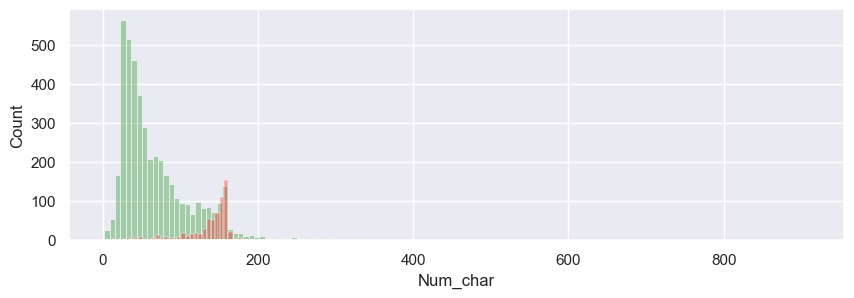

In [29]:
## Visualising Num_char

fig1= sns.set(rc = {'figure.figsize':(10,3)})
fig1 = sns.histplot(data=df[df['v1']=='ham'], x='Num_char', color = 'green', alpha=0.3)
fig1 = sns.histplot(data=df[df['v1']=='spam'], x='Num_char', color = 'red', alpha =0.3)

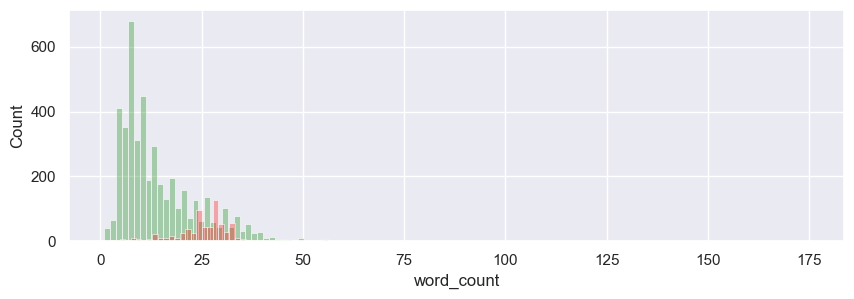

In [30]:
## Visualising word_count

fig1= sns.set(rc = {'figure.figsize':(10,3)})
fig1 = sns.histplot(data=df[df['v1']=='ham'], x='word_count', color = 'green', alpha=0.3)
fig1 = sns.histplot(data=df[df['v1']=='spam'], x='word_count', color = 'red', alpha =0.3)

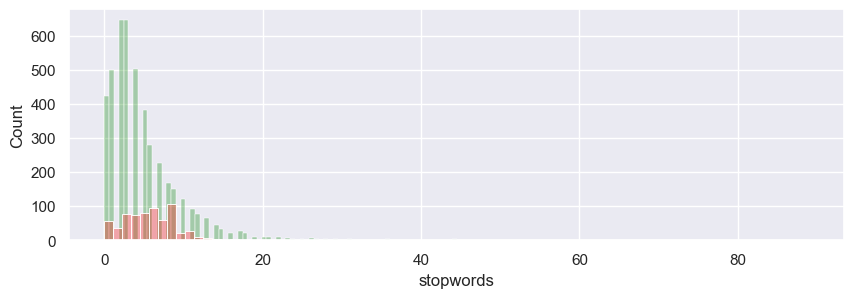

In [31]:
## Visualising stopwords

fig1= sns.set(rc = {'figure.figsize':(10,3)})
fig1 = sns.histplot(data=df[df['v1']=='ham'], x='stopwords', color = 'green', alpha=0.3)
fig1 = sns.histplot(data=df[df['v1']=='spam'], x='stopwords', color = 'red', alpha =0.3)

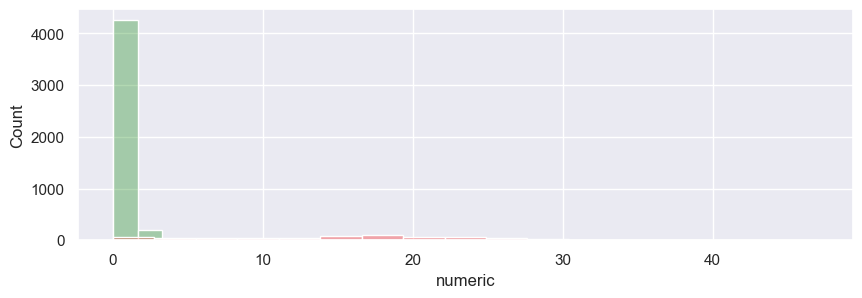

In [32]:
## Visualising numerics

fig1= sns.set(rc = {'figure.figsize':(10,3)})
fig1 = sns.histplot(data=df[df['v1']=='ham'], x='numeric', color = 'green', alpha=0.3)
fig1 = sns.histplot(data=df[df['v1']=='spam'], x='numeric', color = 'red', alpha =0.3)

In [33]:
df[df['v1']=='spam']['numeric'].describe()

count    652.000000
mean      15.509202
std        8.886807
min        0.000000
25%       10.000000
50%       16.000000
75%       22.000000
max       47.000000
Name: numeric, dtype: float64

In [34]:
df[df['v1']=='ham']['numeric'].describe()

count    4516.000000
mean        0.296723
std         1.023142
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        23.000000
Name: numeric, dtype: float64

We can verify that there is a very significant difference on the number of numerics for spam and non spam message. The vast majority of ham message has no numerics, and the mean of numerics in it is very close to 0, whereas the mean of numerics on spam messages is over 15.

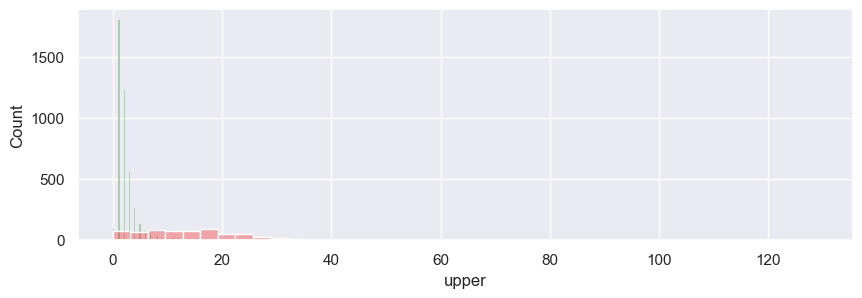

In [35]:
## Visualising numerics

fig1= sns.set(rc = {'figure.figsize':(10,3)})
fig1 = sns.histplot(data=df[df['v1']=='ham'], x='upper', color = 'green', alpha=0.3)
fig1 = sns.histplot(data=df[df['v1']=='spam'], x='upper', color = 'red', alpha =0.3)

In [36]:
df[df['v1']=='spam']['upper'].describe()

count    652.000000
mean      15.274540
std       12.656508
min        0.000000
25%        7.000000
50%       13.000000
75%       21.000000
max      128.000000
Name: upper, dtype: float64

In [37]:
df[df['v1']=='ham']['upper'].describe()

count    4516.000000
mean        3.969885
std        10.899378
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       129.000000
Name: upper, dtype: float64

Again, we can verify very different distributions for Spam and Ham messages when comparing the number of upper cases on the messages.

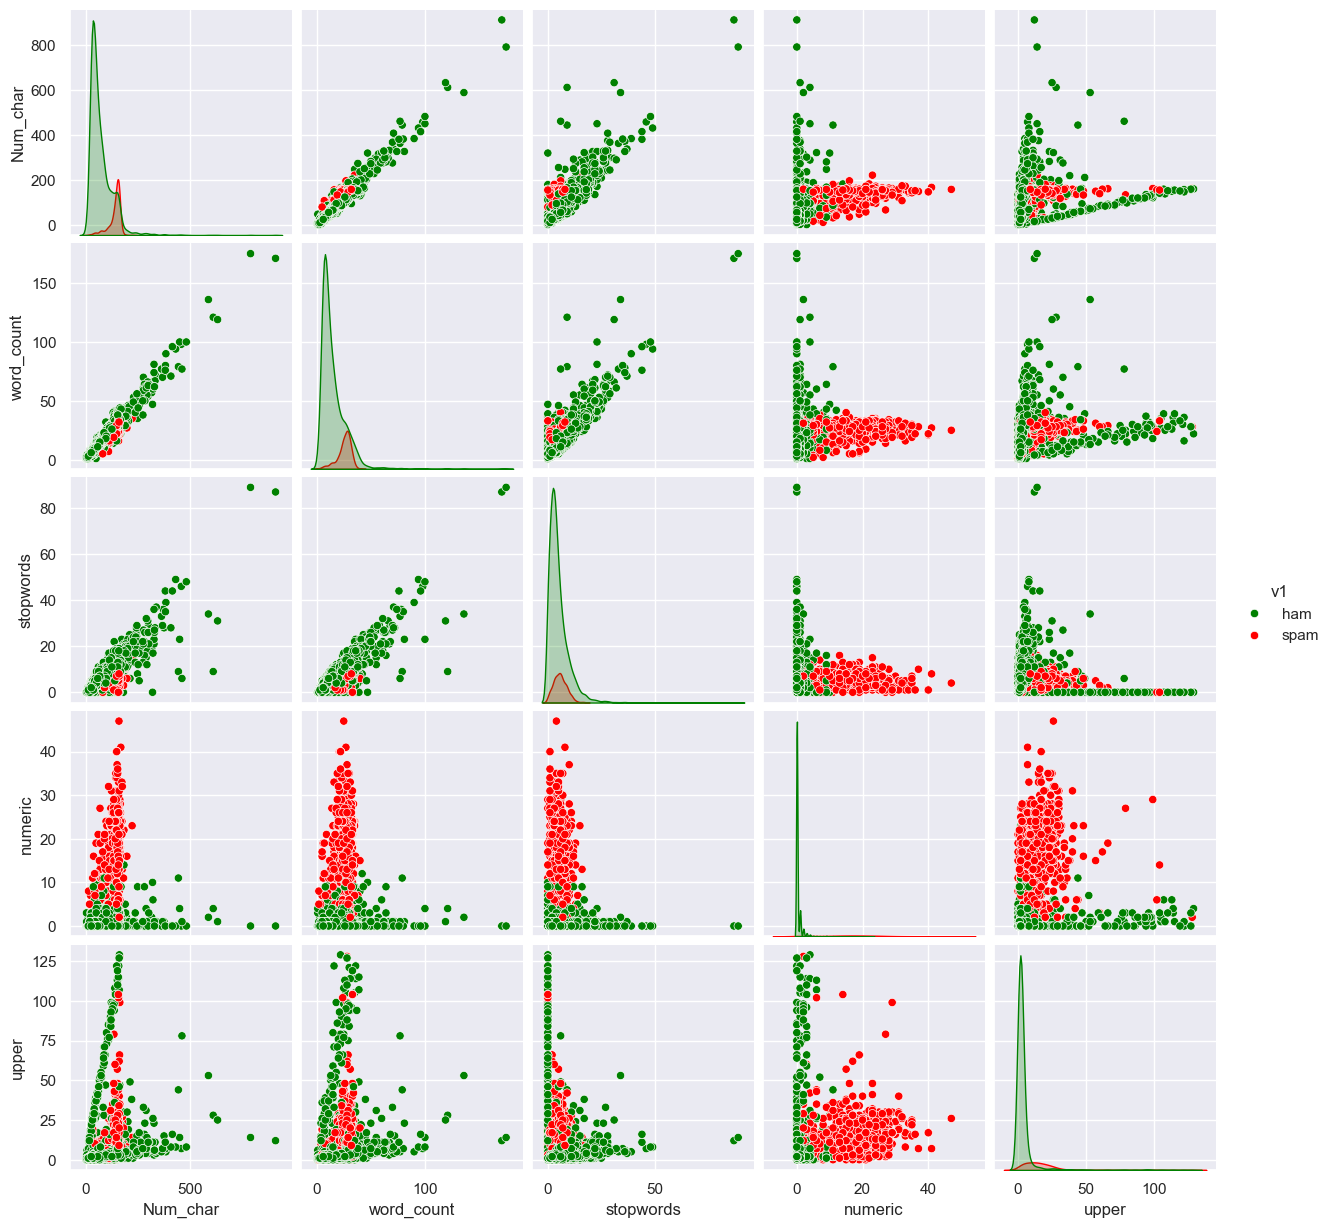

In [38]:
#Plotting a pairplot of our dataset against our target variable
sns.pairplot(data = df, hue = 'v1', palette = ['green', 'red'])
plt.show()

We can verify some variables are highly correlated, such as Num_char, word_count, and stopword, whereas others have very weak correlations, and reveal extremely insightfull patterns.

In [39]:
#Label encoding our target variable.

df['v1'] = df['v1'].map({'ham':0, 'spam':1})

<Axes: title={'center': 'Correlation map'}>

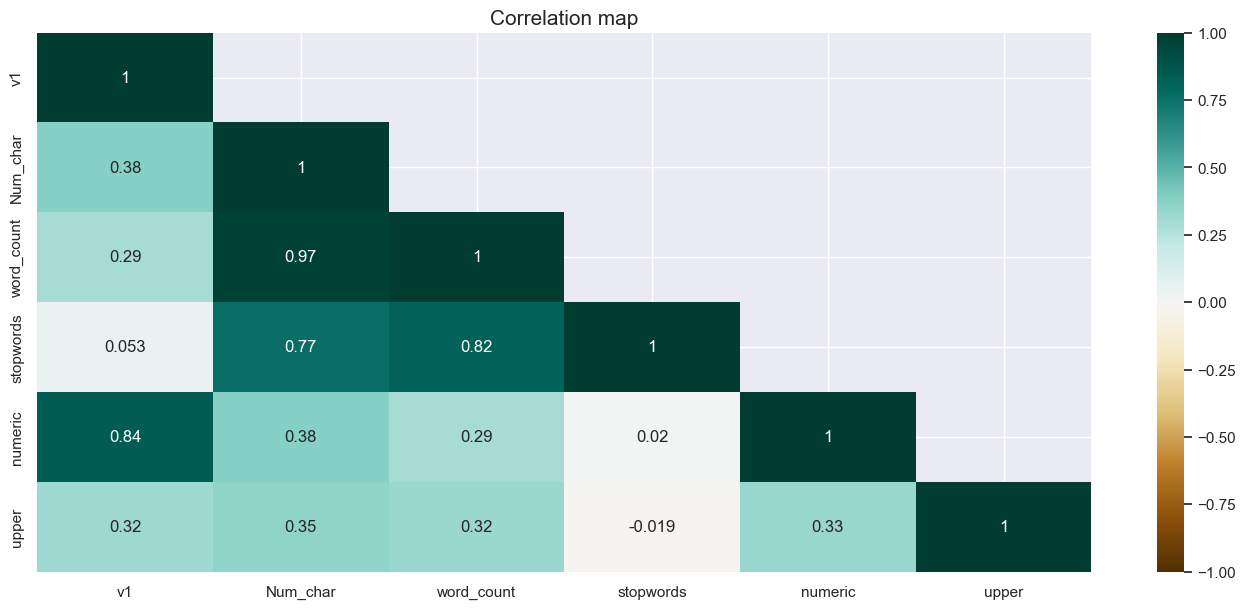

In [40]:
# Plotting correlation among variables

plt.figure(figsize=(17,7))
plt.title("Correlation map", fontsize= 15)
corr_matrix = df.drop(columns = 'text').corr()
mask = np.triu(np.ones_like(corr_matrix), k=1)
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='BrBG', mask=mask)

We verify from the Correlation Map that all our features engineered have a fair correlation with our target variable 'v1', except the feature 'stopwords'. However, we notice that the features 'word_count' is highly correlated to 'Num_char', as 'Num_char' has a higher correlation with our target variable, we will keep it, a discard 'word_count'.

In [41]:
#Discarding features that will not be usefull in our ML models

df.drop(columns = ['word_count', 'stopwords'], inplace = True)

In [42]:
df.head()

,v1,text,Num_char,numeric,upper
0,0,"Go until jurong point, crazy.. Available only ...",111,0,3
1,0,Ok lar... Joking wif u oni...,29,0,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,25,10
3,0,U dun say so early hor... U c already then say...,49,0,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,0,2


# 4. Developing our ML Models

## 4.1. Pre-Processing the data for our ML Models

In [43]:
#Stripping white spaces

df['pre_process_text'] = [string.strip() for string in df['text']]

In [44]:
# Remove periods

df['pre_process_text'] = [string.replace(".", "") for string in df['pre_process_text']]

In [45]:
# Lower Case text
def lower(string: str) -> str:
    return string.lower()

# Apply function
df['pre_process_text'] = [lower(string) for string in df['pre_process_text']]

### Tokenizing text

In [46]:
df.head()

,v1,text,Num_char,numeric,upper,pre_process_text
0,0,"Go until jurong point, crazy.. Available only ...",111,0,3,"go until jurong point, crazy available only in..."
1,0,Ok lar... Joking wif u oni...,29,0,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,25,10,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,0,2,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,0,2,"nah i don't think he goes to usf, he lives aro..."


In [47]:
#Tokenizing our pre_process_text
df['pre_process_text'] = df['pre_process_text'].apply(lambda x: nltk.word_tokenize(x))

In [48]:
#Removing Punctuation from our Tokenized words
df['pre_process_text'] = df['pre_process_text'].apply(lambda x: [word for word in x if word.isalnum()])

In [49]:
#Removing Stop Words from our Tokenized words
df['pre_process_text'] = df['pre_process_text'].apply(lambda x: [word for word in x if word not in stop])

In [50]:
#Stemming words

#Creating a stemmer
porter = PorterStemmer()

#Applying stemmer in our pre processed text
df['pre_process_text'] = df['pre_process_text'].apply(lambda x: [porter.stem(word) for word in x])

In [51]:
#Gathering the Stem words into a sentence again

df['pre_process_text'] = df['pre_process_text'].apply(lambda x: ' '.join(x))

In [52]:
df.head()

,v1,text,Num_char,numeric,upper,pre_process_text
0,0,"Go until jurong point, crazy.. Available only ...",111,0,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,0,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,25,10,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,0,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,0,2,nah think goe usf live around though


## 4.2. Developing our ML Models

In [53]:
#Creating a list with all the model that will be applied

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('SVC', SVC()))
models.append(('MNB', MultinomialNB()))
models.append(('BNB', BernoulliNB()))

In [54]:
#Defining my X and y
X = df[['pre_process_text', 'Num_char', 'numeric', 'upper']]
y = df['v1']

#### Building our model without scaling numeric variables

In [55]:
#Creating a preprocessor to apply TfidVectorizer to our 'text' feature and pass through our numeric features
preprocessor = ColumnTransformer(
            transformers=[
                ('tfidf', TfidfVectorizer(), 'pre_process_text'),
                ('passthrough', 'passthrough', ['Num_char', 'numeric', 'upper'])
            ])

In [56]:
results_precision = []
results_accuracy = []
names = []
for name, model in models:
    pipeline = make_pipeline(preprocessor, model)
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results_precision = cross_val_score(pipeline, X, y, cv=kfold, scoring='precision')
    cv_results_accuracy = cross_val_score(pipeline, X, y, cv=kfold, scoring='accuracy')
    results_precision.append(cv_results_precision)
    results_accuracy.append(cv_results_accuracy)
    names.append(name)
    print('%s: Precision: %f Accuracy: %f' % (name, cv_results_precision.mean(), cv_results_accuracy.mean()))

LR: Precision: 0.964487 Accuracy: 0.976973
SVC: Precision: 0.977460 Accuracy: 0.970588
MNB: Precision: 0.802957 Accuracy: 0.953559
BNB: Precision: 0.998182 Accuracy: 0.971750


#### Building our model scaling numeric variables

In [57]:
#Creating a preprocessor to apply TfidVectorizer to our 'text' feature and apply MinMaxScaler to numeric features
preprocessor_scaler = ColumnTransformer(
            transformers=[
                ('tfidf', TfidfVectorizer(), 'pre_process_text'),
                ('scaler', MinMaxScaler(), ['Num_char', 'numeric', 'upper'])
            ])

In [58]:
results_precision = []
results_accuracy = []
names = []
for name, model in models:
    pipeline = make_pipeline(preprocessor_scaler, model)
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results_precision = cross_val_score(pipeline, X, y, cv=kfold, scoring='precision')
    cv_results_accuracy = cross_val_score(pipeline, X, y, cv=kfold, scoring='accuracy')
    results_precision.append(cv_results_precision)
    results_accuracy.append(cv_results_accuracy)
    names.append(name)
    print('%s: Precision: %f Accuracy: %f' % (name, cv_results_precision.mean(), cv_results_accuracy.mean()))

LR: Precision: 0.994665 Accuracy: 0.976974
SVC: Precision: 0.993527 Accuracy: 0.984714
MNB: Precision: 0.998000 Accuracy: 0.970202
BNB: Precision: 0.998182 Accuracy: 0.971750


It is possible to verify that some models were very sensitive to scalling, such as MultinomialNB, whereas others, such as BernoulliNB, did not show any change at all. The other two models presented substantial improvement. Before scalling our numeric features, BernoulliNB clearly had advantage over the other models, but after scalling, we consider that Support Vector Machine Stands out as the best model. 

We will fit both models to our dataset, scalling our numeric features, and verify the complete report of results, and the confusion matrix.

In [59]:
#Splitting the dataset into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25, stratify = y)

In [60]:
pipelineSVC = Pipeline([
    ('preprocessor', preprocessor_scaler),
    ('classifier', SVC())
])

In [61]:
pipelineSVC.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('tfidf', TfidfVectorizer(),
                                                  'pre_process_text'),
                                                 ('scaler', MinMaxScaler(),
                                                  ['Num_char', 'numeric',
                                                   'upper'])])),
                ('classifier', SVC())])

Accuracy Score:  0.9876160990712074

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1129
           1       1.00      0.90      0.95       163

    accuracy                           0.99      1292
   macro avg       0.99      0.95      0.97      1292
weighted avg       0.99      0.99      0.99      1292



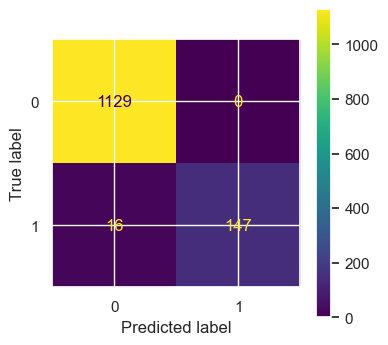

In [62]:
y_pred = pipelineSVC.predict(X_test)

#Printing accuracy Score
print("Accuracy Score: ", metrics.accuracy_score(y_test, y_pred))


#Printing classification report
print("\nClassification Report: "'\n', classification_report(y_test, y_pred))

#Creating and printing Confusion Matrix

disp = ConfusionMatrixDisplay(confusion_matrix= metrics.confusion_matrix(y_test, y_pred))
fig, ax = plt.subplots(figsize=(4, 4))
disp.plot(ax=ax);

In [63]:
pipelineBNB = Pipeline([
    ('preprocessor', preprocessor_scaler),
    ('classifier', BernoulliNB())
])

In [64]:
pipelineBNB.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('tfidf', TfidfVectorizer(),
                                                  'pre_process_text'),
                                                 ('scaler', MinMaxScaler(),
                                                  ['Num_char', 'numeric',
                                                   'upper'])])),
                ('classifier', BernoulliNB())])

Accuracy Score:  0.9721362229102167

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1129
           1       1.00      0.78      0.88       163

    accuracy                           0.97      1292
   macro avg       0.98      0.89      0.93      1292
weighted avg       0.97      0.97      0.97      1292



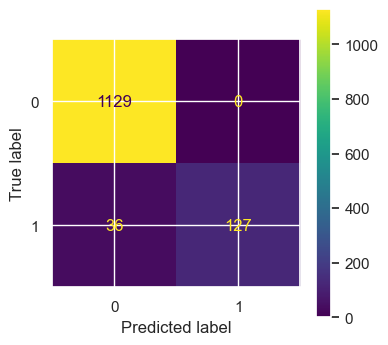

In [65]:
y_pred = pipelineBNB.predict(X_test)

#Printing accuracy Score
print("Accuracy Score: ", metrics.accuracy_score(y_test, y_pred))


#Printing classification report
print("\nClassification Report: "'\n', classification_report(y_test, y_pred))

#Creating and printing Confusion Matrix

disp = ConfusionMatrixDisplay(confusion_matrix= metrics.confusion_matrix(y_test, y_pred))
fig, ax = plt.subplots(figsize=(4, 4))
disp.plot(ax=ax);

As we can verify, the model with the best performance was Support Vector Machine, applying SMOTE.

#### Hyperparameter Tunning

In [66]:
# Create the parameter grid based on the results of random search 
param_gridsvc = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['rbf', 'linear', 'poly'],
    'classifier__gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'classifier__degree': [2, 3, 4], 
    'classifier__class_weight': [None, 'balanced']
        
}
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
# Instantiate the grid search model
grid_search_SVC = GridSearchCV(pipelineSVC, param_grid = param_gridsvc, 
                           cv = kfold, n_jobs = -1,verbose = 1, scoring="accuracy")

In [67]:
#Fitting the GridSearch to our dataset
grid_search_SVC.fit(X,y)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require 

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('tfidf',
                                                                         TfidfVectorizer(),
                                                                         'pre_process_text'),
                                                                        ('scaler',
                                                                         MinMaxScaler(),
                                                                         ['Num_char',
                                                                          'numeric',
                                                                          'upper'])])),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__class_weight': [None, 'balanced'],
                         'classifier__degree': [2, 3, 4],
                         'classifier__gamma': ['scale', 'auto', 0.1, 0.01,
                                               0.001],
                         'classifier__kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy', verbose=1)

In [68]:
print("Best parameters:", grid_search_SVC.best_params_)
print("Best cross-validation score:", grid_search_SVC.best_score_)

Best parameters: {'classifier__C': 10, 'classifier__class_weight': None, 'classifier__degree': 2, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
Best cross-validation score: 0.9885842592176092


In [69]:
pipelineSVC_best_model = Pipeline([
    ('preprocessor', preprocessor_scaler),
    ('classifier', SVC(C = 10, class_weight= None, degree=2, gamma= 0.1, kernel = 'rbf'))
])

In [70]:
pipelineSVC_best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('tfidf', TfidfVectorizer(),
                                                  'pre_process_text'),
                                                 ('scaler', MinMaxScaler(),
                                                  ['Num_char', 'numeric',
                                                   'upper'])])),
                ('classifier', SVC(C=10, degree=2, gamma=0.1))])

Accuracy Score:  0.9922600619195047

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1129
           1       0.99      0.94      0.97       163

    accuracy                           0.99      1292
   macro avg       0.99      0.97      0.98      1292
weighted avg       0.99      0.99      0.99      1292



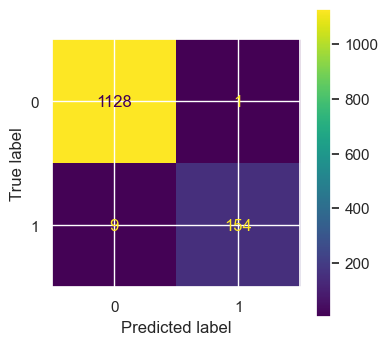

In [71]:
y_pred = pipelineSVC_best_model.predict(X_test)

#Printing accuracy Score
print("Accuracy Score: ", metrics.accuracy_score(y_test, y_pred))


#Printing classification report|
print("\nClassification Report: "'\n', classification_report(y_test, y_pred))

#Creating and printing Confusion Matrix

disp = ConfusionMatrixDisplay(confusion_matrix= metrics.confusion_matrix(y_test, y_pred))
fig, ax = plt.subplots(figsize=(4, 4))
disp.plot(ax=ax);

# 5. Conclusion

In this report we developed a Machine Learning model capable of predicting Spam messages using SMS Text. 3 features correlated to the target variable were engineering from the text, and the text itself was preprocessed and new features were generated from it using TF-IDF, that were passed to our ML algorithms for training e tested in a different portion of our dataseet. 4 different Machine Learning Algorithms were tested, applying and not applying saling technics. 

The model that performed the best on our dataset was Support Vector Machine, when the numeric features were scaled using MinMaxScaler, which reached an accuracy over 98% percent with its standard parameters. After hyperturning  parameters of the model, we were able to identify correctly Spam massages with 99% of accuracy and 99% of precision. Improving more our model would depend of more business context and strategy. 